<a href="https://colab.research.google.com/github/hayannn/AIFFEL_MAIN_QUEST/blob/main/Boston_%EC%A3%BC%ED%83%9D_%EA%B0%80%EA%B2%A9_%EC%98%88%EC%B8%A1_%EB%AA%A8%EB%8D%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터셋 feature 정보

| feature |            설명           |
|---------|--------------------------|
| CRIM    | 자치시별 1인당 범죄율         |
| ZN      | 25,000 평방피트를 초과 거주지역 비율 |
| INDUS   | 비소매상업지역 점유 토지 비율 |
| CHAS    | 찰스강 더미변수(강 경계 1, 아니면 0) |
| NOX     | 10ppm당 농축 일산화질소      |
| RM      | 주택 1가구당 평균 방 개수     |
| AGE     | 1940년 이전 건축된 소유주택 비율 |
| DIS     | 5개 보스턴 직업센터까지 접근성 지수 |
| RAD     | 방사형 도로까지 접근성 지수 |
| TAX     | 10,000 달러당 재산세율 |
| PTRATIO | 자치시(town)별 학생/교사 비율 |
| B       | $1000(Bk−0.63)^2$, Bk: 자치시별 흑인 비율 |
| LSTAT   | 모집단 하위계층 비율(%) |
| MEDV    | 본인 소유 주택가격(중앙값)(단위: $1,000)|

<br>

# 데이터 로드 및 전처리
### 데이터셋
- keras.datasets에 내장된 boston_housing 데이터셋 사용

In [1]:
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [2]:
# keras.datasets의 boston_housing 데이터셋 로드
from keras.datasets import boston_housing

(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()

# 데이터셋 크기 확인
print(len(train_data))
print(len(test_data))

404
102


### 전처리 과정
- 값 범위를 맞추기 위해 표준화 수행(Standardization)
![image](https://github.com/user-attachments/assets/ed0abbe6-c968-43fb-96fe-408b62071b90)
  - 입력 데이터 각 특성 평균 빼기
  - 위를 수행한 입력 데이터 -> 표준편차 나누기
  - 테스트 데이터셋도 동일하게 진행

In [3]:
# 문제 1-1: 데이터셋의 전처리를 위해 표준화 작업 수행
# 먼저 입력 데이터의 각 특성의 평균을 빼기
mean = train_data.mean(axis=0)
train_data -= mean

# 평균을 뺀 입력 데이터에서 표준편차를 나누기
# 데이터 특성의 중앙이 0에 가깝게 만들고, 표준편차가 1이 되게 만듦
std = train_data.std(axis=0)
train_data /= std

# 테스트 데이터셋도 마찬가지로 평균을 빼고, 표준편차로 나누기
test_data = test_data - mean
test_data = test_data / std

<br>

# 모델 구성 및 컴파일
- 주의점 : 분류 모델이 아닌 **회귀 모델**이기 때문에, 이에 맞는 손실함수와 지표를 사용해야 함
  - 회귀모델이니 output 레이어의 경우 활성화 함수를 지정하지 않음
- 옵티마이저의 경우, Adam 사용

In [4]:
# 문제 1-2: 주택 가격 예측을 위한 딥러닝 모델 구성 및 컴파일하기
# input_shape은 (train_data.shape[1], )으로 구성
# 회귀(예측)을 위한 모델이므로 loss를 mse, metrics를 mae로 사용

# 모델 구성
model = models.Sequential()

# 첫 번째 레이어
model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)))

# 두 번째 레이어
model.add(layers.Dense(64, activation='relu'))

# output 레이어
model.add(layers.Dense(1))

# 모델 컴파일
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# 모델 요약 출력
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,121 (20.00 KB)

 Trainable params: 5,121 (20.00 KB)

 Non-trainable params: 0 (0.00 B)

<br>

# 모델 컴파일 & 학습
- epochs는 60
- batch size는 32
- validation_split(검증 데이터)는 20%로 설정

In [5]:
# 문제 1-3: 예측을 위한 딥러닝 모델을 학습합니다.

# 모델 컴파일
model.compile(loss='mse',
              optimizer='adam',
              metrics=['mae'])

# 모델 학습
history = model.fit(train_data, train_labels,
                    epochs=60,
                    batch_size=32,
                    validation_split=0.2,  # 20%의 데이터를 검증용으로 사용
                    verbose=1)

Epoch 1/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 575.1556 - mae: 21.9053 - val_loss: 592.4585 - val_mae: 22.5593
Epoch 2/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 518.7247 - mae: 20.6838 - val_loss: 542.5595 - val_mae: 21.4481
Epoch 3/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 483.2452 - mae: 19.8145 - val_loss: 478.7162 - val_mae: 19.9376
Epoch 4/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 415.9402 - mae: 18.0953 - val_loss: 395.2084 - val_mae: 17.8392
Epoch 5/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 307.5745 - mae: 15.1198 - val_loss: 299.1247 - val_mae: 15.0430
Epoch 6/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 220.9629 - mae: 12.5436 - val_loss: 202.8677 - val_mae: 11.8379
Epoch 7/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 158.8588 - mae: 10.1960 - val_loss: 125.0818 - val_mae: 8.5385
Epoch 8/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 103.0887 - mae: 7.6653 - val_loss: 82.9826 - val_mae: 6.6898
Epoch 9/60
11/11 ━━━━━━━━━━

<br>

# 🚀 troubleshooting
- seaborn 버전 문제로 인해 seaborn-white 적용 안됨 이슈 발생
  - LMS 버전인 0.11.2로 변경 -> 여전히 해결 X

In [9]:
#!pip show sßeaborn

Name: seaborn
Version: 0.13.2
Summary: Statistical data visualization
Home-page: 
Author: 
Author-email: Michael Waskom <mwaskom@gmail.com>
License: 
Location: /usr/local/lib/python3.10/dist-packages
Requires: matplotlib, numpy, pandas
Required-by: missingno


In [23]:
#!pip uninstall seaborn

Found existing installation: seaborn 0.13.2
Uninstalling seaborn-0.13.2:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/seaborn-0.13.2.dist-info/*
    /usr/local/lib/python3.10/dist-packages/seaborn/*
Proceed (Y/n)? Y
  Successfully uninstalled seaborn-0.13.2


In [24]:
#!pip install seaborn==0.11.2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 292.8/292.8 kB 4.8 MB/s eta 0:00:00


- `plt.style.use('seaborn-v0_8-white')` 부분에 v0_8을 추가하여 해결
    - 출처 : [[stackoverflow]Matplotlib - Seaborn-whitegrid is not a valid package style](https://stackoverflow.com/questions/78019854/matplotlib-seaborn-whitegrid-is-not-a-valid-package-style)

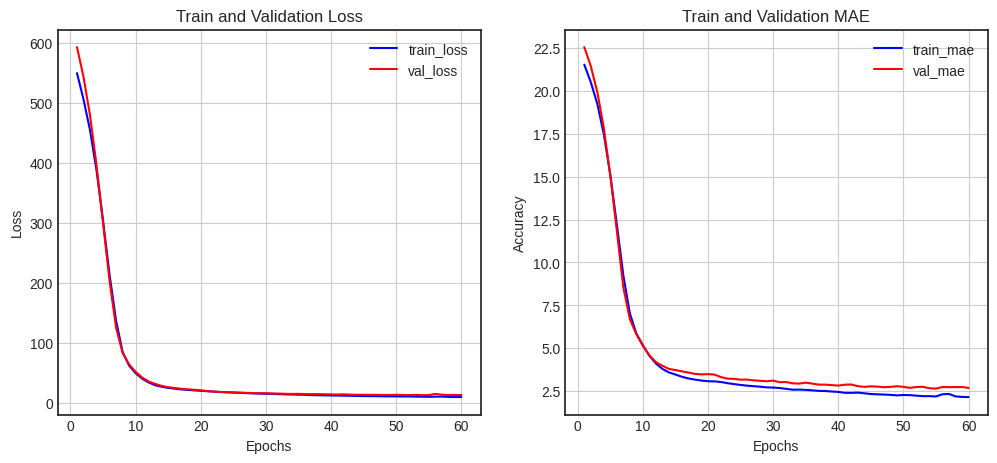

In [8]:
# 모델 학습 히스토리에서 loss, val_loss, mae, val_mae를 차트로 보여줍니다.

plt.style.use('seaborn-v0_8-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

mae = history_dict['mae']
val_mae = history_dict['val_mae']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, mae, 'b-', label='train_mae')
ax2.plot(epochs, val_mae, 'r-', label='val_mae')
ax2.set_title('Train and Validation MAE')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

<br>

# 모델 평가 및 예측

In [17]:
# 문제 1-4: 테스트 데이터셋을 이용해 모델을 평가합니다.

# 테스트 데이터로 모델 성능 평가
test_loss, test_mae = model.evaluate(test_data, test_labels, verbose=0)

print(f"Test Loss: {test_loss}")
print(f"Test MAE: {test_mae}")

# 테스트 데이터로 주택 가격 예측
predictions = model.predict(test_data)

# 예측 결과 일부 출력
print("Predicted prices (first 20):", predictions[:20].flatten())
print("Actual prices (first 20):", test_labels[:20])

Test Loss: 25.50484848022461
Test MAE: 3.3344757556915283
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Predicted prices (first 20): [ 8.284888 16.800785 20.501837 33.33312  25.895046 17.281422 26.141104
 22.134481 19.302366 22.452541 17.985626 17.406693 15.983878 41.48174
 19.217611 18.934742 26.742357 21.770006 19.254314 34.23418 ]
Actual prices (first 20): [ 7.2 18.8 19.  27.  22.2 24.5 31.2 22.9 20.5 23.2 18.6 14.5 17.8 50.
 20.8 24.3 24.2 19.8 19.1 22.7]


<br>

# 추가 : 최종 예측 결과 시각화

- 산점도

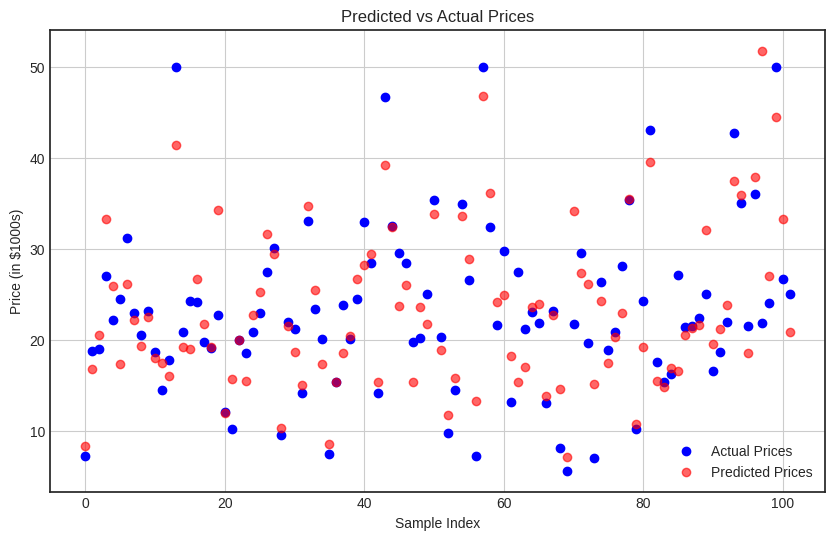

In [18]:
plt.figure(figsize=(10, 6))
plt.scatter(range(len(test_labels)), test_labels, color='blue', label='Actual Prices')
plt.scatter(range(len(test_labels)), predictions.flatten(), color='red', alpha=0.6, label='Predicted Prices')
plt.title('Predicted vs Actual Prices')
plt.xlabel('Sample Index')
plt.ylabel('Price (in $1000s)')
plt.legend()
plt.grid()
plt.show()

- lineplot -> 비교 시 더 유용할 것으로 보임

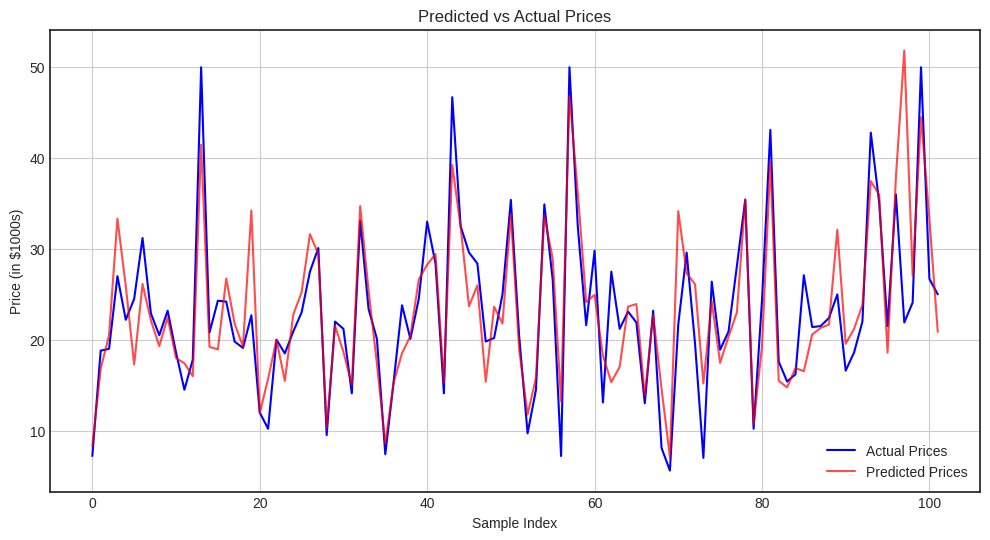

In [19]:
plt.figure(figsize=(12, 6))
plt.plot(range(len(test_labels)), test_labels, 'b-', label='Actual Prices')
plt.plot(range(len(test_labels)), predictions.flatten(), 'r-', label='Predicted Prices', alpha=0.7)
plt.title('Predicted vs Actual Prices')
plt.xlabel('Sample Index')
plt.ylabel('Price (in $1000s)')
plt.legend()
plt.grid()
plt.show()

<br>

# 추가 : 예측 결과 전체 출력해보기


In [13]:
# 테스트 데이터로 모델 성능 평가
test_loss, test_mae = model.evaluate(test_data, test_labels, verbose=0)

print(f"Test Loss (전체 데이터): {test_loss}")
print(f"Test MAE (전체 데이터): {test_mae:}")

# 테스트 데이터로 주택 가격 예측
predictions = model.predict(test_data)

# 전체 예측 결과 출력
print("Predicted Prices vs Actual Prices:")
for i in range(len(test_labels)):
    print(f"Predicted: {predictions[i][0]:.2f}, Actual: {test_labels[i]}")

Test Loss (전체 데이터): 25.50484848022461
Test MAE (전체 데이터): 3.3344757556915283
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Predicted Prices vs Actual Prices:
Predicted: 8.28, Actual: 7.2
Predicted: 16.80, Actual: 18.8
Predicted: 20.50, Actual: 19.0
Predicted: 33.33, Actual: 27.0
Predicted: 25.90, Actual: 22.2
Predicted: 17.28, Actual: 24.5
Predicted: 26.14, Actual: 31.2
Predicted: 22.13, Actual: 22.9
Predicted: 19.30, Actual: 20.5
Predicted: 22.45, Actual: 23.2
Predicted: 17.99, Actual: 18.6
Predicted: 17.41, Actual: 14.5
Predicted: 15.98, Actual: 17.8
Predicted: 41.48, Actual: 50.0
Predicted: 19.22, Actual: 20.8
Predicted: 18.93, Actual: 24.3
Predicted: 26.74, Actual: 24.2
Predicted: 21.77, Actual: 19.8
Predicted: 19.25, Actual: 19.1
Predicted: 34.23, Actual: 22.7
Predicted: 11.90, Actual: 12.0
Predicted: 15.71, Actual: 10.2
Predicted: 20.01, Actual: 20.0
Predicted: 15.47, Actual: 18.5
Predicted: 22.75, Actual: 20.9
Predicted: 25.21, Actual: 23.0
Predicted: 31.63, Actual: 27.5
Predicted: 29.43